## ViTの実装

In [9]:
#### 1. Modelの読み込み
import torch
import torch.nn as nn
from vit import ViT
import matplotlib.pyplot as plt
batch_size = 2
channel = 3 
img_size= 256
num_classes = 10


model = ViT(in_channels = channel,
            image_size = img_size,
            num_classes = num_classes)

ViT is implemented


In [6]:
x = torch.randn(batch_size, channel, img_size, img_size)
print("Input shape is ",x.shape)
pred = model(x)
print("Output shape is ",pred.shape)

Input shape is  torch.Size([2, 3, 32, 32])
Output shape is  torch.Size([2, 10])


In [7]:
pred

tensor([[-0.6904,  0.1335,  0.4351,  0.2070,  0.3900,  0.3058, -0.4890,  0.4632,
         -0.2290, -0.1032],
        [-0.1669,  0.0364,  0.4717,  0.1971,  0.3912,  0.6214, -0.1685,  0.3711,
         -0.7593, -0.0703]], grad_fn=<AddmmBackward0>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


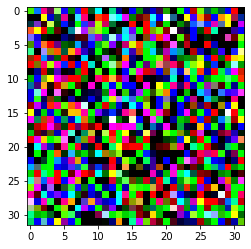

In [10]:
plt.imshow(x[0].permute(1, 2, 0))
plt.show()



### visualize the model

In [4]:
import torchsummary
from torchsummary import summary

# Assuming your model is already defined as 'model' and is compatible with the input dimensions
summary(model, input_size=(channel, img_size, img_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 384, 2, 2]         295,296
           Dropout-2               [-1, 5, 384]               0
   ViT_input_Layer-3               [-1, 5, 384]               0
         LayerNorm-4               [-1, 5, 384]             768
            Linear-5               [-1, 5, 384]         147,456
            Linear-6               [-1, 5, 384]         147,456
            Linear-7               [-1, 5, 384]         147,456
            Linear-8               [-1, 5, 384]         147,840
Self_Attention_Layer-9               [-1, 5, 384]               0
        LayerNorm-10               [-1, 5, 384]             768
           Linear-11              [-1, 5, 1536]         591,360
             GELU-12              [-1, 5, 1536]               0
          Dropout-13              [-1, 5, 1536]               0
           Linear-14               [-

In [5]:
# Calculate the total number of parameters in the model
total_params = sum(p.numel() for p in model.parameters())

print("Total number of parameters: ", total_params)

Total number of parameters:  21581962
